In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("DATAstudents.csv")
df.head()

,STUDENT ID,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1


In [4]:
df

,STUDENT ID,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,1,1,2,1,1,...,1,1,2,1,2,1,3,3,9,5
141,STUDENT142,1,1,2,4,2,2,2,1,4,...,1,1,3,2,2,1,5,3,9,5
142,STUDENT143,1,1,1,4,2,2,2,1,1,...,1,1,3,3,2,1,4,3,9,1
143,STUDENT144,2,1,2,4,1,1,1,5,2,...,2,1,2,1,2,1,5,3,9,4


"Grade" is the obvious target variable in this case. The goal of this analysis will be to analyse the contribution of various features towards predicting and causing the grade by analysing the relationships between variables and using classification and causal inference methods respectively. distribution of other features should also be plotted

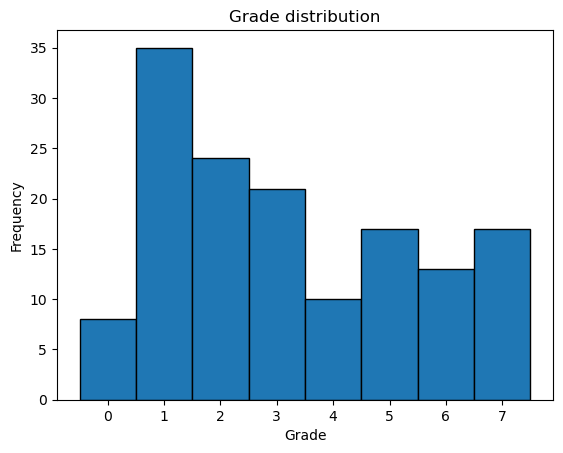

In [13]:
# plot grade distribution
plt.hist(df["GRADE"], bins=[-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5], edgecolor='black')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.title('Grade distribution')
plt.show()

In [41]:
histcols = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13" ,"14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25", "26", "27", "28", "COURSE ID"]

array([[<AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>],
       [<AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>,
        <AxesSubplot:title={'center':'8'}>,
        <AxesSubplot:title={'center':'9'}>,
        <AxesSubplot:title={'center':'10'}>],
       [<AxesSubplot:title={'center':'11'}>,
        <AxesSubplot:title={'center':'12'}>,
        <AxesSubplot:title={'center':'13'}>,
        <AxesSubplot:title={'center':'14'}>,
        <AxesSubplot:title={'center':'15'}>],
       [<AxesSubplot:title={'center':'16'}>,
        <AxesSubplot:title={'center':'17'}>,
        <AxesSubplot:title={'center':'18'}>,
        <AxesSubplot:title={'center':'19'}>,
        <AxesSubplot:title={'center':'20'}>],
       [<AxesSubplot:title={'center':'21'}>,
        <AxesSubplot:title={'center':'22'}>,
        <AxesSu

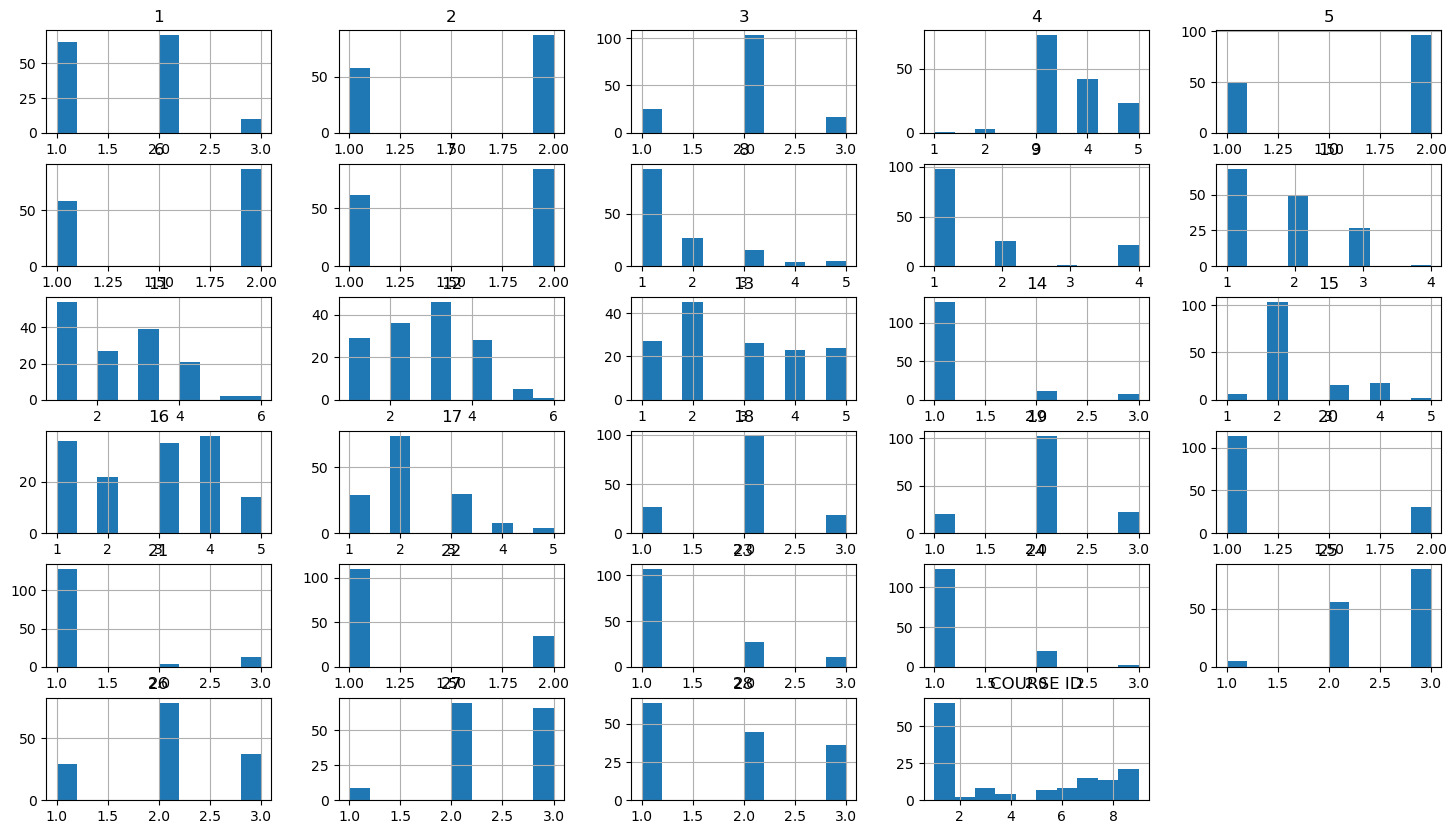

In [42]:
df.hist(histcols, figsize=(18,10))

based on this plot we can note some distributions are highly unbalanced.

moderately unbalanced: 4,9,17,22,23,25,27

highly unbalanced: 3,14,15,18,19,20,21,24

In [5]:
df.corr()

C:\Users\milo\AppData\Local\Temp\ipykernel_30060\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
1,1.000000,0.138233,0.294426,-0.316506,-0.181019,0.138233,0.042572,0.127853,0.001472,-0.199257,...,-0.044462,0.030595,-0.181121,0.235576,-0.100812,0.228884,0.172597,0.121441,-0.304994,-0.095251
2,0.138233,1.000000,0.126218,-0.206876,0.190476,0.224138,-0.125471,-0.022154,-0.013313,-0.154957,...,-0.032164,-0.013833,0.065013,-0.184238,0.065449,0.223095,0.241033,0.292842,-0.430704,0.335533
3,0.294426,0.126218,1.000000,-0.086965,-0.155331,0.073627,0.016557,-0.126440,0.023944,-0.018990,...,-0.027258,-0.053034,0.053969,0.123405,-0.082461,0.055107,0.019802,0.053497,-0.118761,0.104821
4,-0.316506,-0.206876,-0.086965,1.000000,0.055351,-0.154281,0.120346,-0.119024,0.028288,0.036543,...,0.027357,0.005529,0.164447,0.018147,0.147922,-0.095411,0.236460,0.243517,0.317563,0.023963
5,-0.181019,0.190476,-0.155331,0.055351,1.000000,0.220238,0.100010,-0.118284,0.102223,-0.152641,...,-0.153273,-0.246770,-0.033757,-0.158217,0.078973,0.027762,0.034666,0.007706,-0.114794,0.167445
6,0.138233,0.224138,0.073627,-0.154281,0.220238,1.000000,-0.011406,0.060922,0.026626,-0.227030,...,-0.124062,-0.117580,-0.035007,0.004187,-0.028050,0.135949,0.002171,-0.092476,-0.326711,-0.062993
7,0.042572,-0.125471,0.016557,0.120346,0.100010,-0.011406,1.000000,-0.078556,0.037811,-0.168201,...,-0.191197,-0.031005,0.005818,-0.054734,-0.000480,-0.082664,-0.058479,-0.012658,0.068769,-0.051778
8,0.127853,-0.022154,-0.126440,-0.119024,-0.118284,0.060922,-0.078556,1.000000,-0.015926,0.030177,...,0.213079,0.048955,-0.235900,-0.050648,-0.031225,-0.037184,-0.100950,-0.058644,-0.123024,-0.166352
9,0.001472,-0.013313,0.023944,0.028288,0.102223,0.026626,0.037811,-0.015926,1.000000,0.327283,...,-0.015048,-0.094471,0.022769,-0.019064,-0.134057,-0.158432,-0.036078,0.005909,0.114839,-0.156289
10,-0.199257,-0.154957,-0.018990,0.036543,-0.152641,-0.227030,-0.168201,0.030177,0.327283,1.000000,...,0.132236,0.009870,0.066609,0.146396,-0.024462,-0.136949,-0.082775,-0.007332,0.271997,0.023683


In [6]:
df.corr()["GRADE"]

C:\Users\milo\AppData\Local\Temp\ipykernel_30060\4218357644.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()["GRADE"]


1           -0.095251
2            0.335533
3            0.104821
4            0.023963
5            0.167445
6           -0.062993
7           -0.051778
8           -0.166352
9           -0.156289
10           0.023683
11           0.066318
12           0.063504
13           0.084470
14           0.066379
15          -0.030747
16          -0.044268
17          -0.033065
18           0.195617
19           0.003189
20          -0.184763
21          -0.203273
22          -0.139564
23           0.014638
24           0.073783
25           0.044862
26           0.085137
27           0.146547
28           0.110617
29           0.315493
30           0.248588
COURSE ID    0.142166
GRADE        1.000000
Name: GRADE, dtype: float64

These Corrplots are heavily limited by the nature of the categories used. The corr function assigns ordinality and linearity to the encoded features that is either not there or is contrary to the ordinality of the survey answers they represent. one such example is using 1,2,3 to represent +ve, -ve, neutral for feature 21:"Impact of your projects/activities on your success"
below shows 

In [45]:
df["GRADE"].mean()

3.2275862068965515

In [16]:
df[df["2"]==2]["GRADE"].mean()
# this is the mean grade for all male students

3.8275862068965516

In [17]:
df[df["2"]==1]["GRADE"].mean()
#mean grade for all female students

2.3275862068965516

In [18]:
df[df["21"]==1]["GRADE"].mean()
#where students saud +ve

3.390625

In [19]:
df[df["21"]==2]["GRADE"].mean()
#where students said -ve

2.25

In [20]:
df[df["21"]==3]["GRADE"].mean()
#where students said neutral

1.9230769230769231

while the above results may seem counterintuitive, one thing to consider for many of these categories is that they are not evenly distributed within the features at all

In [7]:
df[df["21"]==1]["GRADE"].count()

128

In [8]:
df[df["21"]==2]["GRADE"].count()

4

In [21]:
df[df["21"]==3]["GRADE"].count()

13

In [22]:
pip install jupyter_contrib_nbextensions


     ---------------------------------------- 23.5/23.5 MB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 466.9/466.9 kB 4.2 MB/s eta 0:00:00
  Created wheel for jupyter_contrib_nbextensions: filename=jupyter_contrib_nbextensions-0.7.0-py2.py3-none-any.whl size=23428784 sha256=c510969c09891d20273ab713e516ef7008a7f1a18a778ca9be6a6c9f448bc72d
  Stored in directory: c:\users\milo\appdata\local\pip\cache\wheels\e7\99\91\7f24a075786a6760f3ac32ab5fa92e1d1a90e0d2cd8958adfd
  Created wheel for jupyter_contrib_core: filename=jupyter_contrib_core-0.4.2-py2.py3-none-any.whl size=17484 sha256=cd2ffea76590809dc3957b0fbfa9116401919f3c795e3803c05e2a924dab57fe
  Stored in directory: c:\users\milo\appdata\local\pip\cache\wheels\57\9f\80\32c07b8a950a45f6cf8cd5980c22a27ce514c27b795250e

Class Labels

Student ID
1- Student Age (1: 18-21, 2: 22-25, 3: above 26)
2- Sex (1: female, 2: male)
3- Graduated high-school type: (1: private, 2: state, 3: other)
4- Scholarship type: (1: None, 2: 25%, 3: 50%, 4: 75%, 5: Full)
5- Additional work: (1: Yes, 2: No)
6- Regular artistic or sports activity: (1: Yes, 2: No)
7- Do you have a partner: (1: Yes, 2: No)
8- Total salary if available (1: USD 135-200, 2: USD 201-270, 3: USD 271-340, 4: USD 341-410, 5: above 410)
9- Transportation to the university: (1: Bus, 2: Private car/taxi, 3: bicycle, 4: Other)
10- Accommodation type in Cyprus: (1: rental, 2: dormitory, 3: with family, 4: Other)
11- Mothersâ€™ education: (1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D.)
12- Fathersâ€™ education: (1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D.)
13- Number of sisters/brothers (if available): (1: 1, 2:, 2, 3: 3, 4: 4, 5: 5 or above)
14- Parental status: (1: married, 2: divorced, 3: died - one of them or both)
15- Mothersâ€™ occupation: (1: retired, 2: housewife, 3: government officer, 4: private sector employee, 5: self-employment, 6: other)
16- Fathersâ€™ occupation: (1: retired, 2: government officer, 3: private sector employee, 4: self-employment, 5: other)
17- Weekly study hours: (1: None, 2: <5 hours, 3: 6-10 hours, 4: 11-20 hours, 5: more than 20 hours)
18- Reading frequency (non-scientific books/journals): (1: None, 2: Sometimes, 3: Often)
19- Reading frequency (scientific books/journals): (1: None, 2: Sometimes, 3: Often)
20- Attendance to the seminars/conferences related to the department: (1: Yes, 2: No)
21- Impact of your projects/activities on your success: (1: positive, 2: negative, 3: neutral)
22- Attendance to classes (1: always, 2: sometimes, 3: never)
23- Preparation to midterm exams 1: (1: alone, 2: with friends, 3: not applicable)
24- Preparation to midterm exams 2: (1: closest date to the exam, 2: regularly during the semester, 3: never)
25- Taking notes in classes: (1: never, 2: sometimes, 3: always)
26- Listening in classes: (1: never, 2: sometimes, 3: always)
27- Discussion improves my interest and success in the course: (1: never, 2: sometimes, 3: always)
28- Flip-classroom: (1: not useful, 2: useful, 3: not applicable)
29- Cumulative grade point average in the last semester (/4.00): (1: <2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49)
30- Expected Cumulative grade point average in the graduation (/4.00): (1: <2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49)
31- Course ID
32- OUTPUT Grade (0: Fail, 1: DD, 2: DC, 3: CC, 4: CB, 5: BB, 6: BA, 7: AA)

the output grade column could be reproduced in numerical form based on the following conversions, using the average of each range of grades. 

AA	90.00 - 100.00
BA	85.00 - 89.00
BB	80.00 - 84.00
CB	75.00 - 79.00
CC	70.00 - 74.00
DC	60.00 - 69.00
DD	50.00 - 59.00
B		Successful (Başarılı)
FF	0.00 - 49.00	

# Dimensionality reduction
there are already many features sin this dataset, and several more will need to be added through 1 hot encoding. as a result, to miinimize the effects of the curse of dimensionality, where possible features will becombined/reduced through various different methods. Also, in some cases, due to the limited number of observations, categories(especially those with 5 or more categories) will be combined into simpler categories, as this increases the number of values in each category, and allows models to learn more about those features.

while features 29 and 30 definitely contribute to the final grade, they are as much dependent on the other results as the target dependent variable, and they will be set aside for the purposes of determining what IVs contribute the most to the final grade.

In [14]:
previous_grades = pd.DataFrame()
previous_grades['cumulative_gpa'] = df.pop('29')
previous_grades['expected_gpa'] = df.pop('30')
previous_grades

,cumulative_gpa,expected_gpa
0,1,1
1,2,3
2,2,2
3,3,2
4,2,2
...,...,...
140,3,3
141,5,3
142,4,3
143,5,3


In [18]:
df.drop(columns ="STUDENT ID",inplace = True)

In [19]:
df

,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,COURSE ID,GRADE
0,2,2,3,3,1,2,2,1,1,1,...,1,1,1,1,3,2,1,2,1,1
1,2,2,3,3,1,2,2,1,1,1,...,1,1,1,1,3,2,3,2,1,1
2,2,2,2,3,2,2,2,2,4,2,...,1,1,1,1,2,2,1,1,1,1
3,1,1,1,3,1,2,1,2,1,2,...,1,1,1,2,3,2,2,1,1,1
4,2,2,1,3,2,2,1,3,1,4,...,1,1,2,1,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,2,1,2,3,1,1,2,1,1,2,...,1,1,1,1,2,1,2,1,9,5
141,1,1,2,4,2,2,2,1,4,2,...,1,2,1,1,3,2,2,1,9,5
142,1,1,1,4,2,2,2,1,1,1,...,1,1,1,1,3,3,2,1,9,1
143,2,1,2,4,1,1,1,5,2,3,...,1,1,2,1,2,1,2,1,9,4


### BASIC DECISION TREE ALGORITHM
while dimenionality reduction and feature analysis will inevitably produce a much greater degree of information about the data, a basic decision tree will be valuable in learning about feature importances and providing a benchmark for accuracy going forward

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


In [24]:
X = df.drop(columns='GRADE')
y = df["GRADE"]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)


In [33]:
DTC = DecisionTreeClassifier(random_state=1)
DTC.fit(X_train, y_train)
y_pred = DTC.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

In [34]:
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.22
Classification Report:
               precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       0.50      0.27      0.35        11
           2       0.14      0.25      0.18         4
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         2
           5       0.17      0.33      0.22         3
           6       0.00      0.00      0.00         6
           7       0.40      0.40      0.40         5

    accuracy                           0.22        37
   macro avg       0.19      0.28      0.21        37
weighted avg       0.24      0.22      0.21        37



In [36]:
importances = DTC.feature_importances_

for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance}")

1: 0.0
2: 0.03917055753913757
3: 0.028277945619335342
4: 0.014773413897280957
5: 0.06376017158487236
6: 0.026352745077612226
7: 0.04187356609045272
8: 0.0
9: 0.025558912386706944
10: 0.024471299093655585
11: 0.08019500137324913
12: 0.07318083728959862
13: 0.05358807196937267
14: 0.0
15: 0.043532314239543915
16: 0.024471299093655585
17: 0.02900302114803625
18: 0.04563581433672067
19: 0.027162444805949336
20: 0.0
21: 0.0
22: 0.010876132930513593
23: 0.043504531722054374
24: 0.0
25: 0.036253776435045314
26: 0.07932750029426765
27: 0.05119551143720328
28: 0.034743202416918424
COURSE ID: 0.10309192921881735


while the accuracy is very low, and the feature importances are all also very low, some features have higher importance than others. Course ID, 11,12, 26 and 5, (parental incomes, listening in class, and undertaking additional work) have some of the highest relative feature importances. This warrants some amount of further investigation of these variables.

It is worth noting that while Course ID has the most significant impact on the classification, there is no way to interpret them. as a result their inclusion in vasios analyses will need to be justified separately


What are the actions that must be performed for appropriate feature analysis? false ordinality of some features needs to be removed through 1HE. While  3, 9, 10, 14, 15, 16, 23, 24, 28, or shifted in the case of 21.
On the other hand, what  steps aren't necessary but will potentially reduce dimensionality and increase accuracy? features can be combined, dropped, re encoded, and in some cases categories may be combined. 

In [43]:
# for row 21 re order the encoding
df["21"] = df["21"].replace({1:3, 2:1, 3:2})

One thing that should be considered when deciding whether or not to drop a category from a feature is the variance in the target variable as a result in the change between the categories. A function will be created to check how much the different categories change with regards the +ve categories. these will be compared with the mean grade of 3.2 If there is no significant effect on the target variable due to changes in the 

In [ ]:
def get_var(column,)
    for category in column:
        df[df[column]==category]["GRADE"].mean()
        print(f"")

while there is no urgent need to remove categories with few occurences in ordinal features, these categories would add unnecessary dimensionality if encoded with 1he, so the balance plots for the variables will be consulted along with basic domain and feature knowledge in order to justify removal/condensation of some categories. This decision can be seen in appendix doc A

In cases where there are not enough occurences of a given category within a feature, that category should probably be either removed or condensed into other categories. this will be 